<a href="https://colab.research.google.com/github/brainmentorspvtltd/IGDTU_PyTorchTraining/blob/main/IG_HAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

os.environ["KAGGLE_USERNAME"] = "ravikanttyagi"
os.environ["KAGGLE_KEY"] = "b1c3d9b397544e3e647817206c0329ff"

!kaggle datasets download meetnagadia/human-action-recognition-har-dataset

100% 296M/297M [00:16<00:00, 21.2MB/s]
100% 297M/297M [00:16<00:00, 18.4MB/s]


In [3]:
# !unzip human-action-recognition-har-dataset.zip

In [4]:
# PIL
# opencv

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

# **Explore Dataset**

In [6]:
train_path = "Human Action Recognition/train"
test_path = "Human Action Recognition/test"

In [25]:
random_img = train_path + "/" + "Image_5.jpg"

In [26]:
img = cv2.imread(random_img)

In [27]:
type(img)

numpy.ndarray

In [28]:
img.shape

(210, 240, 3)

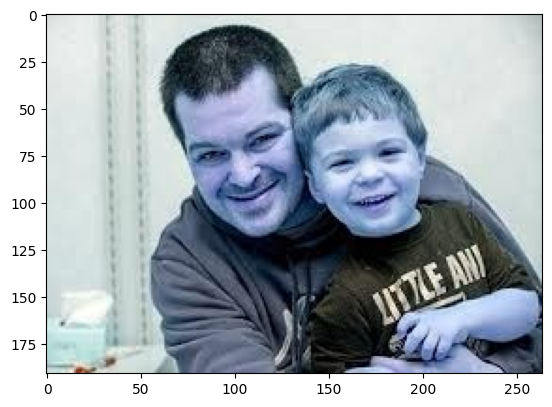

In [16]:
plt.imshow(img)
plt.show()

In [17]:
df = pd.read_csv("Human Action Recognition/Training_set.csv")

In [18]:
df.head()

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop


In [20]:
df.iloc[545]

filename    Image_546.jpg
label             hugging
Name: 545, dtype: object

In [21]:
filenames = df['filename'].values

In [22]:
filenames[:10]

array(['Image_1.jpg', 'Image_2.jpg', 'Image_3.jpg', 'Image_4.jpg',
       'Image_5.jpg', 'Image_6.jpg', 'Image_7.jpg', 'Image_8.jpg',
       'Image_9.jpg', 'Image_10.jpg'], dtype=object)

In [23]:
df['label'][0]

'sitting'

In [30]:
def load_data(path, df):
  images_list = []
  labels_list = []
  for i in tqdm(range(len(filenames))):
    # concat train_path with image name
    img_path = path + "/" + filenames[i]
    # fetch image label from data frame of current image
    img_label = df['label'][i]
    # read image using opencv
    img = cv2.imread(img_path)
    # resize image because images might be of different dimensions
    # in order to maintain array, we have to resize all the images in same dimension
    img = cv2.resize(img, (150,150))
    # store images one by one in your list
    images_list.append(img)
    labels_list.append(img_label)

  images_arr = np.asarray(images_list)
  labels_arr = np.asarray(labels_list)

  return images_arr, labels_arr

In [45]:
train_df = pd.read_csv("Human Action Recognition/Training_set.csv")
# test_df = pd.read_csv("Human Action Recognition/Testing_set.csv")

In [44]:
# test_df.head()

In [36]:
train_images, train_labels = load_data(train_path, train_df)

100%|██████████| 12600/12600 [00:11<00:00, 1065.19it/s]


In [37]:
train_images.shape

(12600, 150, 150, 3)

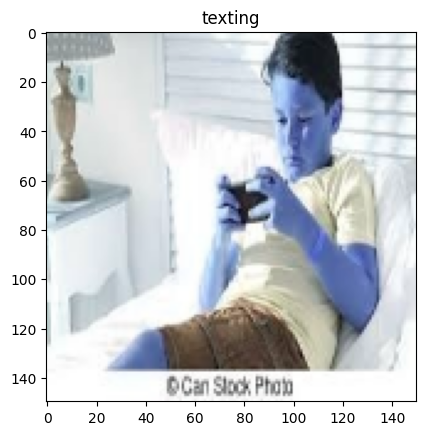

In [41]:
plt.imshow(train_images[1670])
plt.title(train_labels[1670])
plt.show()